## ASSEMBLY is the process of turning shorter READS into longer CONTIGS.

- The software that performs the assembly is called the **“assembler.”**

### Challenges of assembly
- Skills and expertises are not defined
- No specific optimized command that fits for all type of **genome**
- Complex options in tools without proper explanation
- Have to go through "Trial and error" process
- Even when assembly appears to work, almost always it will contain several severe and substantial errors.

### “White whale” of assembly
- The white whale of assembly is obtaining **“single linear genome.”**
- The better we understand large-scale genomic variation, the more apparent it becomes that no single reference genome could characterize each member of the same species.

### Genome Graph: A better alternative to single reference genome
- [A great news article on Genome Graph](https://www.statnews.com/2016/10/07/dna-genome-sequencing-new-maps/)
- [Genome graphs and the evolution of genome inference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5411762/)
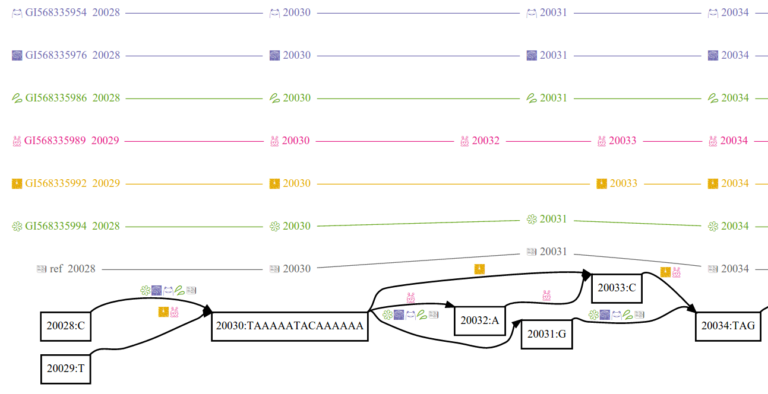
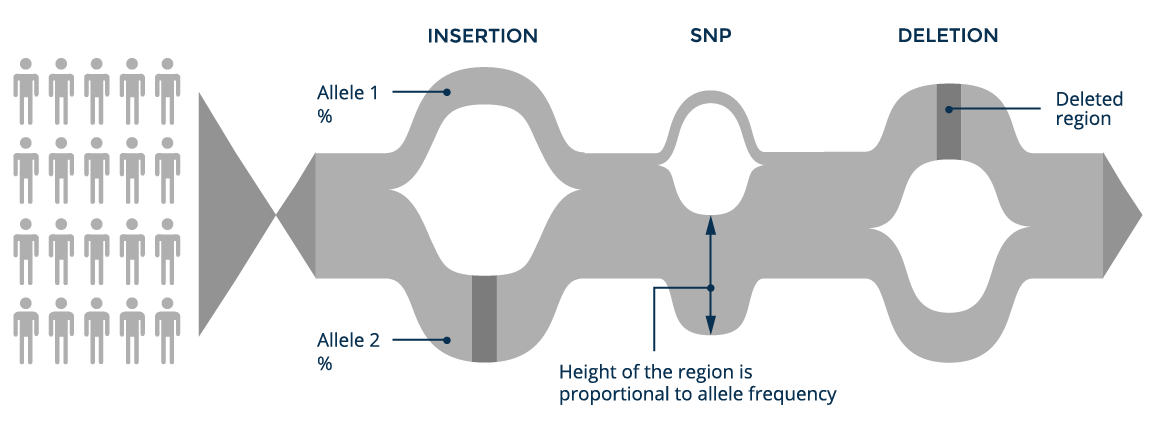

### Steps of Genome Assembly

The typical genome assembly process is composed of three different stages:
1. **Assembling contigs**: Merging reads into longer contigs.
2. **Scaffolding the contigs**: Spatially orienting contigs relative to one another.
3. **Finishing the genome**: Bridging over the spaces between the spatially oriented contigs and connecting them.

### How to Quantify Assembly Quality
Ideally, we expect assemblies to have:

1. Contiguity. Produce the longest possible contigs.
2. Correctness. Assemble contigs with few/no errors.
3. Completeness. Cover the entire original sequence and minimize missing regions.

> Also called **the 3Cs (CCC)** as shorthand notation.

`Balancing these three requires trade-offs based on the requirement of the problem that is being solved.`

### Types of Assembly Errors You May Get?

**Chaff**: contigs that are comparable to a read size. These are indicative of dead ends in the assembly process.

**Misjoins**: joining two sequences that should not be together.

**Coverage misses**: regions of the genome that are not assembled at all.

**Repeat compression**: a common error that makes consecutive repeats appear as a single sequence. `ZZZ ABC ABC ABC ZZZ` may look like as `ZZZ ABC ZZZ`


## *de novo* genome assembly

> Process of taking a large number of short DNA sequences and putting them back together to create a representation of the original chromosomes from which the DNA originated

- Assume no prior knowledge of the source DNA sequence length, layout or composition.
- In a genome sequencing project, the DNA of the target organism is broken up into millions of small pieces and read on a sequencing machine.
- These “reads” vary from 20 to 1000 nucleotide base pairs (bp) in length.
> Typically for Illumina type short read sequencing, reads of length 36 - 150 bp are produced.
- These reads can be either “single ended” or “paired end.”
- Paired end reads are produced when the fragment size used in the sequencing process is much longer (typically 250 - 500 bp long) and the ends of the fragment are read in towards the middle.

- One from the left hand end of a fragment and one from the right with a known separation distance between them.

> `The known separation distance is actually a distribution with a mean and standard deviation as not all original fragments are of the same length.`

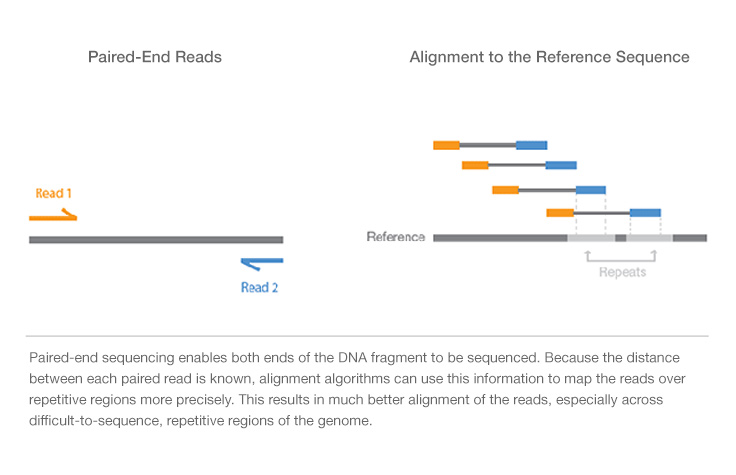

- The goal of a sequence assembler is to produce long contiguous pieces of sequence (contigs) from these reads.
- The contigs are sometimes then ordered and oriented in relation to one another to form scaffolds.
- The mechanisms used by assembly software are varied but the most common type for short reads is assembly by ***de Bruijn graph***.
- See [this document](https://www.melbournebioinformatics.org.au/tutorials/tutorials/assembly/assembly-background/#de-novo-assembly-with-velvet-and-the-velvet-optimiser) for an explanation of the de Bruijn graph genome assembler “Velvet.”

## Coverage
The term “coverage” in NGS always describes a relation between sequence reads and a reference (e.g. a whole genome or a locus).

> Often synonymously used with the term **sequencing depth**, which is another different term (or, at least according to some expert).


`That's why it is very important to distinguish between them.`


### Formula to calculate coverage
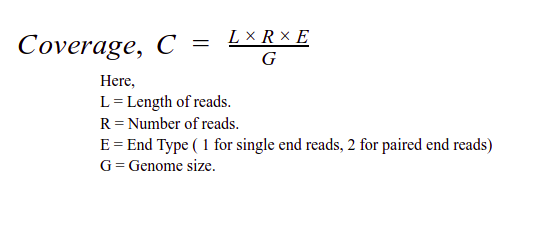

1. **Coverage** (*that we commonly use*): number of reads that align to, or "cover," a known reference. It describes how often, in average, a reference sequence is covered by bases from the reads.
2.  **Percentage of coverage**: E.g. if 90% of a reference is covered by reads (and 10% not) it is a 90% coverage.
3. **Sequencing depth**: total number of usable reads from the sequencing machine (usually used in the unit “number of reads” (in millions). ***Especially used for RNA-seq.***

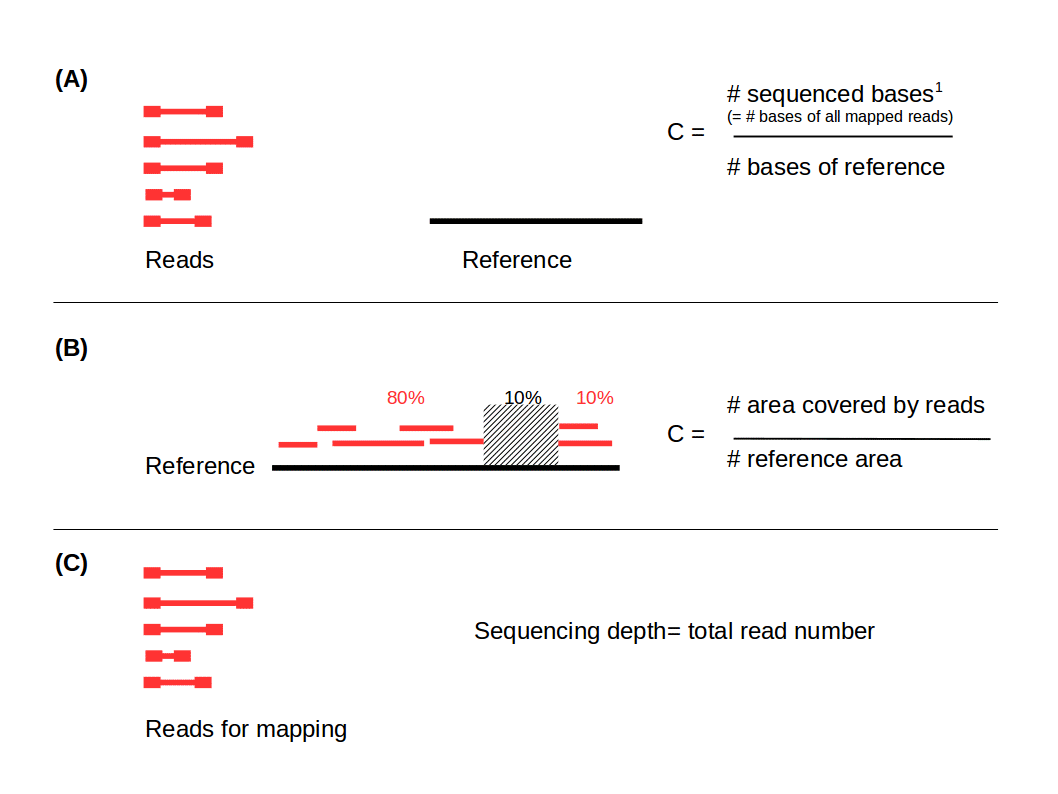

Figure 1: Distinction between coverage in terms of redundancy (A), percentage of coverage (B) and sequencing depth (C). 1) Sequenced bases is the number of reads x read length

### Coverage Types

There are different possible reference points for the coverage leading to three different coverage types.

Thereby the coverage can refer the --
- whole genome
- one locus (in the genome)
- one (nucleotide-) position

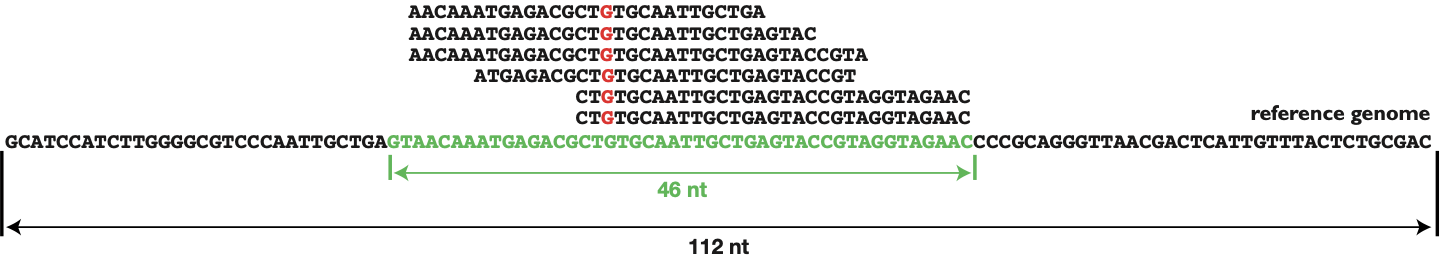

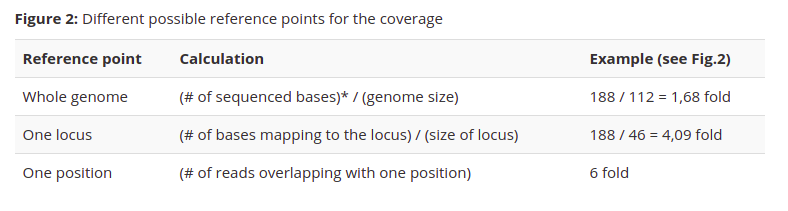


## What is a good coverage for an NGS project?

- There is no general guideline for determining the optimal coverage for a sequencing project.
- It highly depends on the type of experiment, the species, the input material, the sequencing platform and other factors.
-  Illumina, for example, provides on their website the possibility to search for publications with similar experiments so you can use these as pointers for your project, and also a Sequencing Coverage Calculator ([link](https://support.illumina.com/downloads/sequencing_coverage_calculator.html))

### Typical coverages for DNA sequencing?
- Genome assembly 50x and above
- Variation calling (resequencing) 20x and above.

#### Link of resource used for this discussion on Coverage
[How to calculate the coverage for a NGS experiment](https://www.ecseq.com/support/ngs/how-to-calculate-the-coverage-for-a-sequencing-experiment#:~:text=The%20term%20%E2%80%9Ccoverage%E2%80%9D%20in%20NGS,a%20total%20read%20number%20(Fig.&text=Coverage%20in%20terms%20of%20redundancy,cover%2C%22%20a%20known%20reference.)

#### A python script to calculate coverage.
`Synopsis: python srciptName.py`

In [2]:
#!/usr/bin/env python


#Ask for input

readsnumber = int(input('Please insert the number of reads (in bp): '))

length = int(input('What is the length of the Reads (in bp): '))

endtype = int(input('Insert 1 for single-end and 2 for paired-end: '))

genomesize = int(input('What is the genome size (in bp): '))



#code 
coverage = str(int(((length * readsnumber * endtype) / genomesize)))


print("The coverage of your data is: ", coverage + "x")

print ("Thank you")

Please insert the number of reads (in bp): 1000000
What is the length of the Reads (in bp): 101
Insert 1 for single-end and 2 for paired-end: 2
What is the genome size (in bp): 300000
The coverage of your data is:  673x
Thank you


## N50 statistics

- Even though the N50 statistic is the most commonly used measure of the quality of a genome assembly, it might come as a surprise that its meaning is not rigorously defined.
- `As a matter of fact, no definition for N50 that we’ve seen appears to be entirely correct.`

#### A simpler explanation of N50, ( course might not be quite correct), starts by ordering contigs by length.
- Suppose we have 10 different contigs (designated by `XXXXXX` ) and we ordered these by their decreasing sizes:

`
Contig         Length           Sum
XXXXXXXXXX       10              10
XXXXXXXXX         9              19
XXXXXXXX          8              27
XXXXXXX           7              34
XXXXXX            6              40
XXXXX             5              45
XXXX              4              49
XXX               3              52
XX                2              54
X                 1              55
`

- The sum of these lengths starting with the longest is `55`. Half of that is `27.5`.
- Go down on this list and add up the lengths to find the contig where the cumulative length exceeds this half value.
- When we hit contig number `7` we have `10 + 9 + 8 + 7 = 34`, this value is larger than `27.5`
- Our N50 is then `7`

#### Another simple way to state this (following the wording of this [blogpost](http://jermdemo.blogspot.com/2008/11/calculating-n50-from-velvet-output.html)) is that:
> `At least half of the nucleotides in this assembly belong to contigs of size 7bp or longer.`

- **NG50** resembles N50 except the metric relates to the genome size rather than the assembly size.
- **NA50** and **NGA50** are analogous to **N50** and **NG50** where the contigs are replaced by blocks that can be aligned to the reference.

## Counting k-mer with kmergenie
> #### KmerGenie estimates the best k-mer length for genome de novo assembly.

- KmerGenie predictions can be applied to ***single-k*** genome assemblers **(e.g. Velvet, SOAPdenovo 2, ABySS, Minia)**.
- ***Multi-k*** genome assemblers **(e.g. SPAdes, IDBA)** generally perform better with default parameters (using multiple k values), rather than the single best k predicted by KmerGenie

## Genome Assebmbly The protocol in a nutshell:¶
- Obtain sequence read file(s) from sequencing machine(s).
- Look at the reads - get an understanding of what you’ve got and what the quality is like.
- Raw data cleanup/quality trimming if necessary.
- Choose an appropriate assembly parameter set.
- Assemble the data into contigs/scaffolds.
- Examine the output of the assembly and assess assembly quality.

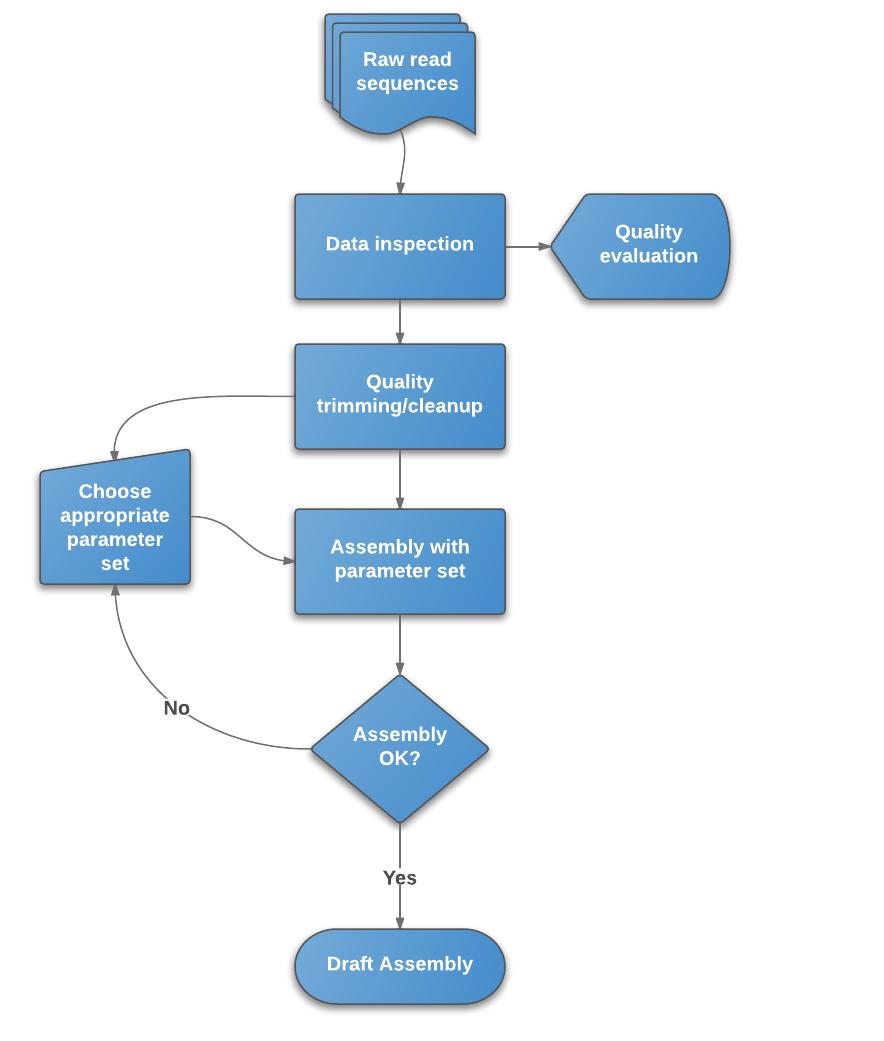

Figure: Flowchart of de novo assembly protocol.

# de novo of SARS-CoV-2

In [7]:
# activating conda environment
conda activate bioriyaz

(bioriyaz) 

: 1

## 1. Data Collection

In [5]:
mkdir -p all_data/reads_data

In [11]:
# Downloading reads
fastq-dump ERR5494176 --split-files -O all_data/reads_data

(bioriyaz) Read 1083438 spots for ERR5494176
Written 1083438 spots for ERR5494176
(bioriyaz) 

: 1

In [49]:
# Check data
seqkit stats all_data/reads_data/*

(bioriyaz) file                                    format  type   num_seqs      sum_len  min_len  avg_len  max_len
all_data/reads_data/ERR5494176_1.fastq  FASTQ   DNA   1,083,438  146,517,622       35    135.2      151
all_data/reads_data/ERR5494176_2.fastq  FASTQ   DNA   1,083,438  146,590,675       35    135.3      151
all_data/reads_data/combined.fq         FASTQ   DNA   1,723,468  168,340,761        1     97.7      151
all_data/reads_data/trimmed_1.fq        FASTQ   DNA     861,734   90,793,066        1    105.4      151
all_data/reads_data/trimmed_2.fq        FASTQ   DNA     861,734   77,547,695        1       90      151
(bioriyaz) 

: 1

### [Optional] If you wish to use some reads (let's say 600000 read) from main data
`seqkit sample -2 -n 600000 all_data/reads_data/ERR5494176_1.fastq  > data/F1.fq
 seqkit sample -2 -n 600000 all_data/reads_data/ERR5494176_2.fastq  > data/F2.fq`

In [52]:
# Set variable for raw data
READ1=all_data/reads_data/ERR5494176_1.fastq
READ2=all_data/reads_data/ERR5494176_2.fastq

(bioriyaz) (bioriyaz) (bioriyaz) 

: 1

## 2. Sequencing quality control

Quality control (abbreviated as QC from now on) is the process of improving data by removing identifiable errors from it.

- Since it is a process that alters the data, we must be **extremely cautious** not to introduce new features into it inadvertently.
- Do note:
> `It is common to expect too much from quality control. Remember that QC cannot turn bad data into useful data and we can never salvage what appears to be a total loss.`

### How do we perform quality control?
QC typically follows this process.

- Evaluate (visualize) data quality.
- Stop and move to the next analysis step if the quality appears to be satisfactory.
- If not, execute one or more data altering steps then go to step 1.

### List of QC tools
- Trimmomatic
- BBDuk
- flexbar
- cutadapt

### Adapter Trimming

In [63]:
# set variable for trimmed data
QCREAD1=all_data/reads_data/trimmed_1.fq
QCREAD2=all_data/reads_data/trimmed_2.fq

# set variable for unpaired trimmed data
UNP1=all_data/reads_data/unpaired_1.fq
UNP2=all_data/reads_data/unpaired_2.fq

(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) 

: 1

In [53]:
# running trimming code
trimmomatic PE $READ1 $READ2 $QCREAD1 $UNP1 $QCREAD2 $UNP2 SLIDINGWINDOW:4:30 TRAILING:30 ILLUMINACLIP:adapter/adapters.fa:2:30:5

(bioriyaz) TrimmomaticPE: Started with arguments:
 all_data/reads_data/ERR5494176_1.fastq all_data/reads_data/ERR5494176_2.fastq all_data/reads_data/trimmed_1.fq all_data/reads_data/trimmed_2.fq SLIDINGWINDOW:4:30 TRAILING:30 ILLUMINACLIP:adapter/adapters.fa:2:30:5
Multiple cores found: Using 4 threads
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACTCCCGAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GACGCTGCCGACGATCTTACGCGTGTAGATCTCGGTGGTCGCCGTATCATT'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACACTGATATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACCTATACATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACCACTCAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACGGCTACATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACGTCCGCATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'CTGAG

Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACTGACCAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACGTGAAACGATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACACAGTGATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACGCCAATATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACCAACTAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACCAGATCATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'CCGAGCCCACGAGACAGGCAGAAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'CCGAGCCCACGAGACCGTACTAGATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'CCGAGCCCACGAGACTAAGGCGAATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACTAGCTTATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'GATCGGAAGAGCACACGTCTGAACTCCAGTCACGGCTACATCTCGTATGCCGTCT

: 1

In [55]:
# create directory for all results
mkdir results

(bioriyaz) mkdir: cannot create directory ‘results’: File exists
(bioriyaz) 

: 1

In [56]:
mkdir results/fastqc_output
fastqc $READ1 $READ2 $QCREAD1 $QCREAD2 -o results/fastqc_output

(bioriyaz) Started analysis of ERR5494176_1.fastq
Approx 5% complete for ERR5494176_1.fastq
Approx 10% complete for ERR5494176_1.fastq
Approx 15% complete for ERR5494176_1.fastq
Approx 20% complete for ERR5494176_1.fastq
Approx 25% complete for ERR5494176_1.fastq
Approx 30% complete for ERR5494176_1.fastq
Approx 35% complete for ERR5494176_1.fastq
Approx 40% complete for ERR5494176_1.fastq
Approx 45% complete for ERR5494176_1.fastq
Approx 50% complete for ERR5494176_1.fastq
Approx 55% complete for ERR5494176_1.fastq
Approx 60% complete for ERR5494176_1.fastq
Approx 65% complete for ERR5494176_1.fastq
Approx 70% complete for ERR5494176_1.fastq
Approx 75% complete for ERR5494176_1.fastq
Approx 80% complete for ERR5494176_1.fastq
Approx 85% complete for ERR5494176_1.fastq
Approx 90% complete for ERR5494176_1.fastq
Approx 95% complete for ERR5494176_1.fastq
Analysis complete for ERR5494176_1.fastq
Started analysis of ERR5494176_2.fastq
Approx 5% complete for ERR5494176_2.fastq
Approx 10% c

: 1

## 3. Assembly

## Predict kmer size with kmergenie

In [57]:
# Combine the data
cat $QCREAD1 $QCREAD2 > all_data/reads_data/combined.fq

(bioriyaz) (bioriyaz) 

: 1

In [58]:
# create folder for kmergenie outputfiles
mkdir -p results/kmergeniefiles

# Calculate k-mer size by kmergenie
kmergenie all_data/reads_data/combined.fq -o results/kmergeniefiles/outputs


(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) running histogram estimation
Setting maximum kmer length to: 151 bp
computing histograms (from k=21 to k=121): 31 41 21 61 51 71 101 91 81 111 121 
ntCard wall-clock time over all k values: 67 seconds 
fitting model to histograms to estimate best k
estimation of the best k so far: 61
refining estimation around [55; 67], with a step of 2
running histogram estimation
Setting maximum kmer length to: 151 bp
computing histograms (from k=57 to k=67): 61 59 57 63 65 67 
ntCard wall-clock time over all k values: 33 seconds 
fitting model to histograms to estimate best k
table of predicted num. of genomic k-mers: results/kmergeniefiles/outputs.dat
recommended coverage cut-off for best k: 22
best k: 57
(bioriyaz) 

: 1

#### kmergenie recommended k: 57

## Download Reference genome

In [26]:
# Make a directory for the reference.
mkdir -p all_data/refs

# Accession number for the SARS-CoV-2
ACC=NC_045512.2

# This is the reference name.
REF=all_data/refs/${ACC}.fa

# Get the reference sequence.
efetch -db=nuccore -format=fasta -id=$ACC | seqret -filter -sid $ACC > $REF

(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) 

: 1

In [40]:
# check the referene
seqkit stat $REF

(bioriyaz) file                          format  type  num_seqs  sum_len  min_len  avg_len  max_len
all_data/refs/NC_045512.2.fa  FASTA   DNA          1   29,903   29,903   29,903   29,903
(bioriyaz) 

: 1

## Assembly minia assembler with default (31) k-mer

In [59]:
#create a output directory
mkdir -p results/minia31_results

# Assembly with Minia.
minia -in all_data/reads_data/combined.fq -out results/minia31_results/minia31

(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) setting storage type to hdf5
[Approximating frequencies of minimizers ]  100  %   elapsed:   0 min 0  sec   remaining:   0 min 0  sec   cpu: 100.0 %   mem: [  29,   29,   29] MB 
[DSK: Collecting stats on combined       ]  100  %   elapsed:   0 min 1  sec   remaining:   0 min 0  sec   cpu:  99.0 %   mem: [  47,   47,   47] MB 
[DSK: nb solid kmers: 851094             ]  100  %   elapsed:   0 min 26 sec   remaining:   0 min 0  sec   cpu: 247.8 %   mem: [ 118,  658,  699] MB 
bcalm_algo params, prefix:results/minia31_results/minia31.unitigs.fa k:31 a:2 minsize:10 threads:4 mintype:1
DSK used 1 passes and 4 partitions
prior to queues allocation                      17:45:29     memory [current, maxRSS]: [ 105,  699] MB 
Starting BCALM2                                 17:45:29     memory [current, maxRSS]: [ 105,  699] MB 
[Iterating DSK partitions                ]  100  %   elapsed:   0 min 5  sec   remaining:   0 min 0  sec
Number of sequences 

Gluing partition 620 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 640 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 660 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 680 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 700 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 720 (size: 0 MB)               17:45:39     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 740 (size: 0 MB)               17:45:40     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 760 (size: 0 MB)               17:45:40     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 780 (size: 0 MB)               17:45:40     memory [current, maxRSS]: [ 191,  699] MB 
Gluing partition 800 (size: 0 MB)               17:45:40     mem

step 1 pass 4                                   17:45:44     memory [current, maxRSS]: [ 191,  699] MB 
step 2 (11931kmers/28223extremities)            17:45:44     memory [current, maxRSS]: [ 191,  699] MB 
step 1 pass 5                                   17:45:44     memory [current, maxRSS]: [ 191,  699] MB 
step 2 (10365kmers/23928extremities)            17:45:44     memory [current, maxRSS]: [ 191,  699] MB 
step 1 pass 6                                   17:45:45     memory [current, maxRSS]: [ 191,  699] MB 
step 2 (3267kmers/7968extremities)              17:45:45     memory [current, maxRSS]: [ 191,  699] MB 
step 1 pass 7                                   17:45:45     memory [current, maxRSS]: [ 191,  699] MB 
step 2 (3600kmers/8111extremities)              17:45:45     memory [current, maxRSS]: [ 191,  699] MB 
gathering links from disk                       17:45:45     memory [current, maxRSS]: [ 191,  699] MB 
Done finding links between unitigs              17:45:46     mem

    -in                                      : all_data/reads_data/combined.fq
    -out                                     : results/minia31_results/minia31
    -traversal                               : contig
    -fasta-line                              : 0
    -tip-len-topo-kmult                      : 2.500000
    -tip-len-rctc-kmult                      : 10.000000
    -tip-rctc-cutoff                         : 2.000000
    -bulge-len-kmult                         : 3.000000
    -bulge-len-kadd                          : 100
    -bulge-altpath-kadd                      : 50
    -bulge-altpath-covmult                   : 1.100000
    -ec-len-kmult                            : 9.000000
    -ec-rctc-cutoff                          : 4.000000
    -kmer-size                               : 31
    -abundance-min                           : 2
    -abundance-max                           : 2147483647
    -abundance-min-threshold                 : 2
    -histo-max                         

: 1

In [41]:
# check minia31 result
seqkit stat results/minia31_results/minia31.contigs.fa

(bioriyaz) file                                        format  type  num_seqs  sum_len  min_len  avg_len  max_len
results/minia31_results/minia31.contigs.fa  FASTA   DNA         54   31,250       31    578.7   10,249
(bioriyaz) 

: 1

## Running minia with kmer size recommended by kmergenie

In [60]:
# create a directory for minia second run
mkdir -p results/minia57_results

# Assembly with Minia with kmer size recommended by kmergenie.
minia -in all_data/reads_data/combined.fq -kmer-size 57 -out results/minia57_results/minia57

(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) setting storage type to hdf5
[Approximating frequencies of minimizers ]  100  %   elapsed:   0 min 0  sec   remaining:   0 min 0  sec   cpu: 102.6 %   mem: [  37,   37,   37] MB 
[DSK: Collecting stats on combined       ]  100  %   elapsed:   0 min 2  sec   remaining:   0 min 0  sec   cpu:  95.5 %   mem: [  55,   55,   55] MB 
[DSK: nb solid kmers: 937750             ]  100  %   elapsed:   0 min 44 sec   remaining:   0 min 0  sec   cpu: 193.6 %   mem: [ 137,  913,  952] MB 
bcalm_algo params, prefix:results/minia57_results/minia57.unitigs.fa k:57 a:2 minsize:10 threads:4 mintype:1
DSK used 1 passes and 4 partitions
prior to queues allocation                      17:48:10     memory [current, maxRSS]: [ 132,  952] MB 
Starting BCALM2                                 17:48:10     memory [current, maxRSS]: [ 132,  952] MB 
[Iterating DSK partitions                ]  100  %   elapsed:   0 min 7  sec   remaining:   0 min 0  sec
Number of sequences 

Gluing partition 620 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 640 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 660 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 680 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 700 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 720 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 740 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 760 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 780 (size: 0 MB)               17:48:21     memory [current, maxRSS]: [ 222,  952] MB 
Gluing partition 800 (size: 0 MB)               17:48:21     mem

step 1 pass 4                                   17:48:25     memory [current, maxRSS]: [ 222,  952] MB 
step 2 (11571kmers/22866extremities)            17:48:25     memory [current, maxRSS]: [ 222,  952] MB 
step 1 pass 5                                   17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
step 2 (9559kmers/18724extremities)             17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
step 1 pass 6                                   17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
step 2 (3105kmers/6329extremities)              17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
step 1 pass 7                                   17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
step 2 (3336kmers/6344extremities)              17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
gathering links from disk                       17:48:26     memory [current, maxRSS]: [ 222,  952] MB 
Done finding links between unitigs              17:48:27     mem

step 2 (1kmers/3extremities)                    17:48:40     memory [current, maxRSS]: [ 222,  952] MB 
step 1 pass 7                                   17:48:40     memory [current, maxRSS]: [ 222,  952] MB 
step 2 (1kmers/3extremities)                    17:48:40     memory [current, maxRSS]: [ 222,  952] MB 
gathering links from disk                       17:48:40     memory [current, maxRSS]: [ 222,  952] MB 
Done finding links between unitigs              17:48:40     memory [current, maxRSS]: [ 222,  952] MB 
    -in                                      : all_data/reads_data/combined.fq
    -kmer-size                               : 57
    -out                                     : results/minia57_results/minia57
    -traversal                               : contig
    -fasta-line                              : 0
    -tip-len-topo-kmult                      : 2.500000
    -tip-len-rctc-kmult                      : 10.000000
    -tip-rctc-cutoff                         : 2.000000


: 1

In [61]:
# check minia57 result
seqkit stat results/minia57_results/minia57.contigs.fa

(bioriyaz) file                                        format  type  num_seqs  sum_len  min_len  avg_len  max_len
results/minia57_results/minia57.contigs.fa  FASTA   DNA         32   31,577       57    986.8   10,503
(bioriyaz) 

: 1

## Assembly with Velvet

### Calculate insert size

In [65]:
bwa index $REF
bwa mem $REF $READ1 $READ2 | samtools view -F 4 -f 3 -F 16 | datamash mean 9

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.01 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index all_data/refs/NC_045512.2.fa
[main] Real time: 0.045 sec; CPU: 0.023 sec
(bioriyaz) [M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 72388 sequences (10000007 bp)...
[M::process] read 74106 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (27, 35598, 95, 31)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (97, 129, 232)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 502)
[M::mem_pestat] mean and std.dev: (142.79, 78.12)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 637)
[M::mem_pestat] analyzing insert size distributi

[M::mem_pestat] (25, 50, 75) percentile: (89, 151, 281)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 665)
[M::mem_pestat] mean and std.dev: (133.89, 73.35)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 857)
[M::mem_pestat] skip orientation FF
[M::mem_pestat] skip orientation RF
[M::mem_pestat] skip orientation RR
[M::mem_process_seqs] Processed 74098 reads in 6.320 CPU sec, 6.234 real sec
[M::process] read 74486 sequences (10000251 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (31, 36067, 94, 27)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (102, 139, 195)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 381)
[M::mem_pestat] mean and std.dev: (140.17, 59.74)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 474)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 7

[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 749)
[M::mem_pestat] mean and std.dev: (174.11, 109.81)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 965)
[M::mem_pestat] skip orientation FF
[M::mem_pestat] skip orientation RF
[M::mem_pestat] skip orientation RR
[M::mem_process_seqs] Processed 74156 reads in 5.988 CPU sec, 5.812 real sec
[M::process] read 73592 sequences (10000288 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (20, 35716, 95, 14)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (99, 140, 470)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1212)
[M::mem_pestat] mean and std.dev: (189.82, 183.35)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1583)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (142, 206, 266)
[M::mem_pestat] low an

[M::mem_pestat] mean and std.dev: (220.08, 189.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1095)
[M::mem_pestat] skip orientation FF
[M::mem_pestat] skip orientation RF
[M::mem_pestat] skip orientation RR
[M::mem_process_seqs] Processed 73364 reads in 6.206 CPU sec, 6.117 real sec
[M::process] read 74136 sequences (10000125 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (24, 36606, 63, 35)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (99, 197, 493)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1281)
[M::mem_pestat] mean and std.dev: (216.19, 163.60)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1675)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (130, 197, 256)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 508)
[M::mem_pestat] mean 

[M::mem_pestat] low and high boundaries for proper pairs: (1, 1026)
[M::mem_pestat] skip orientation FF
[M::mem_pestat] skip orientation RF
[M::mem_pestat] skip orientation RR
[M::mem_process_seqs] Processed 74634 reads in 6.075 CPU sec, 5.929 real sec
[M::process] read 74168 sequences (10000151 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (18, 36386, 86, 22)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (96, 144, 493)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1287)
[M::mem_pestat] mean and std.dev: (219.69, 191.87)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1684)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (132, 199, 260)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 516)
[M::mem_pestat] mean and std.dev: (197.75, 85.78)
[M::mem_pestat] low an

[M::mem_pestat] skip orientation FF
[M::mem_pestat] skip orientation RF
[M::mem_pestat] skip orientation RR
[M::mem_process_seqs] Processed 73968 reads in 5.951 CPU sec, 5.745 real sec
[M::process] read 73352 sequences (10000203 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (20, 36382, 95, 42)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (94, 109, 259)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 589)
[M::mem_pestat] mean and std.dev: (162.89, 127.73)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 754)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (133, 202, 262)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 520)
[M::mem_pestat] mean and std.dev: (198.97, 86.25)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 649)
[M::mem_pestat] analyzing

223.93635526269
(bioriyaz) 

: 1

#### Estimated insert size: 224

In [66]:
#compute subsequences of a given k-mer (31) size
velveth results/velvet57 57 -fastq -separate -shortPaired $READ1 $READ2

#assemble the genome from these precomputed data
velvetg results/velvet57 -exp_cov auto -ins_length 224

(bioriyaz) [0.000000] Reading FastQ file all_data/reads_data/ERR5494176_1.fastq;
[0.000055] Reading FastQ file all_data/reads_data/ERR5494176_2.fastq;
[15.941387] 2166876 sequences found in total in the paired sequence files
[15.941406] Done
[16.031719] Reading read set file results/velvet57/Sequences;
[17.126221] 2166876 sequences found
[22.084923] Done
[22.084963] 2166876 sequences in total.
[22.085054] Writing into roadmap file results/velvet57/Roadmaps...
[28.402002] Inputting sequences...
[28.403356] Inputting sequence 0 / 2166876
[65.163348] Inputting sequence 2000000 / 2166876
[72.929892] Inputting sequence 1000000 / 2166876
[79.275620]  === Sequences loaded in 50.873643 s
[79.275696] Done inputting sequences
[79.275707] Destroying splay table
[79.344171] Splay table destroyed
(bioriyaz) (bioriyaz) (bioriyaz) [0.000001] Reading roadmap file results/velvet57/Roadmaps
[8.536537] 2166876 roadmaps read
[8.539423] Creating insertion markers
[9.124882] Ordering insertion markers
[11.9

: 1

In [72]:
#compute subsequences of a given k-mer (31) size
velveth results/velvet135 135 -fastq -separate -shortPaired $READ1 $READ2

#assemble the genome from these precomputed data
velvetg results/velvet135 -exp_cov auto -ins_length 224

(bioriyaz) [0.000000] Reading FastQ file all_data/reads_data/ERR5494176_1.fastq;
[0.000054] Reading FastQ file all_data/reads_data/ERR5494176_2.fastq;
[16.027191] 2166876 sequences found in total in the paired sequence files
[16.027216] Done
[16.161592] Reading read set file results/velvet135/Sequences;
[17.163387] 2166876 sequences found
[22.076017] Done
[22.076046] 2166876 sequences in total.
[22.076157] Writing into roadmap file results/velvet135/Roadmaps...
[28.454723] Inputting sequences...
[28.467960] Inputting sequence 0 / 2166876
[44.917390] Inputting sequence 2000000 / 2166876
[47.564736] Inputting sequence 1000000 / 2166876
[51.576080]  === Sequences loaded in 23.121372 s
[51.579741] Done inputting sequences
[51.579769] Destroying splay table
[51.621912] Splay table destroyed
(bioriyaz) (bioriyaz) (bioriyaz) [0.000000] Reading roadmap file results/velvet135/Roadmaps
[6.439975] 2166876 roadmaps read
[6.442556] Creating insertion markers
[6.858262] Ordering insertion markers
[8

: 1

In [74]:
#check velvet result
seqkit stat results/velvet135/velvet135.contigs.fa

(bioriyaz) file                                    format  type  num_seqs  sum_len  min_len  avg_len  max_len
results/velvet135/velvet135.contigs.fa  FASTA   DNA         15   23,315      279  1,554.3    6,072
(bioriyaz) 

: 1

## Assembly with SPAdes assembly

In [69]:
spades.py -1 $READ1 -2 $READ2 -o results/spades

Command line: /home/arriyaz/miniconda3/envs/bioriyaz/bin/spades.py	-1	/home/arriyaz/Desktop/genome_assembly/all_data/reads_data/ERR5494176_1.fastq	-2	/home/arriyaz/Desktop/genome_assembly/all_data/reads_data/ERR5494176_2.fastq	-o	/home/arriyaz/Desktop/genome_assembly/results/spades	

System information:
  SPAdes version: 3.13.0
  Python version: 3.6.10
  OS: Linux-5.4.0-70-generic-x86_64-with-debian-bullseye-sid

Output dir: /home/arriyaz/Desktop/genome_assembly/results/spades
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: paired-end
      orientation: fr
      left reads: ['/home/arriyaz/Desktop/genome_assembly/all_data/reads_data/ERR5494176_1.fastq']
      right reads: ['/home/arriyaz/Desktop/genome_assembly/all_data/reads_data/ERR5494176_2.fa

  0:06:53.315   300M / 3G    INFO   Hamming Subclustering    (kmer_cluster.cpp          : 656)     Total solid k-mers: 285712
  0:06:53.315   300M / 3G    INFO   Hamming Subclustering    (kmer_cluster.cpp          : 657)     Substitution probabilities: [4,4]((0.9324,0.019065,0.0155349,0.0330005),(0.0435591,0.916091,0.0283464,0.0120037),(0.0114911,0.027686,0.916133,0.0446899),(0.0322596,0.0152505,0.0185568,0.933933))
  0:06:53.324   300M / 3G    INFO    General                 (main.cpp                  : 178)   Finished clustering.
  0:06:53.325   300M / 3G    INFO    General                 (main.cpp                  : 197)   Starting solid k-mers expansion in 4 threads.
  0:07:49.722   300M / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 0 produced 420187 new k-mers.
  0:08:42.524   300M / 3G    INFO    General                 (main.cpp                  : 218)   Solid k-mers iteration 1 produced 104919 new k-mers.
  0:09:36.161   300

  0:00:42.332     2G / 2G    INFO    General                 (kmer_splitters.hpp        : 295)   Adding contigs from previous K
  0:00:42.510    16M / 2G    INFO    General                 (kmer_splitters.hpp        : 308)   Used 4318210 reads
  0:00:42.510    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:42.620    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 2013408 kmers in total.
  0:00:42.620    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:42.661    16M / 2G    INFO    General                 (stage.cpp                 : 101)   PROCEDURE == Extension index construction
  0:00:42.661    16M / 2G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 301)   Building kmer index
  0:00:42.661    16M / 2G    INFO    General                 (kmer_index_builder.hpp    : 117)   Split

  0:01:35.423    44M / 3G    INFO    General                 (simplification.cpp        : 357)   Graph simplification started
  0:01:35.423    44M / 3G    INFO    General                 (graph_simplification.hpp  : 634)   Creating parallel br instance
  0:01:35.423    44M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 1
  0:01:35.424    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:01:35.516    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 2215 times
  0:01:35.516    44M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:53.276    48M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 10538 times
  0:01:53.276    48M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running

  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 0 times
  0:01:53.507    52M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 10
  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 0 times
  0:01:53.507    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:01:54.214    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 1

  0:02:09.950    48M / 3G    INFO    General                 (contig_output_stage.cpp   :  51)   Outputting FastG graph to /home/arriyaz/Desktop/genome_assembly/results/spades//K21/assembly_graph.fastg
  0:02:10.888    48M / 3G    INFO    General                 (contig_output.hpp         :  22)   Outputting contigs to /home/arriyaz/Desktop/genome_assembly/results/spades//K21/simplified_contigs.fasta
  0:02:11.300    48M / 3G    INFO    General                 (contig_output.hpp         :  22)   Outputting contigs to /home/arriyaz/Desktop/genome_assembly/results/spades//K21/final_contigs.fasta
  0:02:11.703    48M / 3G    INFO    General                 (launch.hpp                : 149)   SPAdes finished
  0:02:11.825    16M / 3G    INFO    General                 (main.cpp                  : 109)   Assembling time: 0 hours 2 minutes 11 seconds
Max read length detected as 151
Default k-mer sizes were set to [21, 33, 55, 77] because estimated read length (151) is equal to or greater tha

  0:00:37.852    56M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 1236864 bytes occupied (3.71558 bits per kmer).
  0:00:37.867    68M / 3G    INFO    General                 (construction.cpp          : 388)   Collecting k-mer coverage information from reads, this takes a while.
  0:01:13.989    68M / 3G    INFO    General                 (construction.cpp          : 508)   Filling coverage and flanking coverage from PHM
  0:01:14.642    68M / 3G    INFO    General                 (construction.cpp          : 464)   Processed 272214 edges
  0:01:14.667    52M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == EC Threshold Finding
  0:01:14.674    52M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 181)   Kmer coverage valley at: 40
  0:01:14.675    52M / 3G    INFO    General                 (kmer_coverage_model.cpp   : 201)   K-mer histogram maximum: 42
  0:01:14.675    52M / 3G  

  0:01:33.585    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 9 times
  0:01:33.586    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:01:34.176    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 16536 times
  0:01:34.176    52M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 6
  0:01:34.176    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:01:34.208    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 607 times
  0:01:34.208    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:37.200    52M / 3G    INFO   Simplification           (parallel_processing.hpp 

  0:01:39.262    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:39.402    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 0 times
  0:01:39.402    52M / 3G    INFO    General                 (simplification.cpp        : 330)   Disrupting self-conjugate edges
  0:01:39.429    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Removing isolated edges
  0:01:39.438    52M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Removing isolated edges triggered 781 times
  0:01:39.438    52M / 3G    INFO    General                 (simplification.cpp        : 470)   Counting average coverage
  0:01:39.449    52M / 3G    INFO    General                 (simplification.cpp        : 476)   Average coverage = 776.372
  0:01:39.449    52M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == 

  0:00:30.409    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 3554313 kmers in total.
  0:00:30.417    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:30.523    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:00:31.018    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 150)   Merging final buckets.
  0:00:31.294    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 336)   Index built. Total 1656352 bytes occupied (3.72809 bits per kmer).
  0:00:31.312    20M / 3G    INFO   DeBruijnExtensionIndexBu (kmer_extension_index_build:  99)   Building k-mer extensions from k+1-mers
  0:00:34.568    20M / 3G    INFO   DeBruijnExtensionIndexBu (kmer_extension_index_build: 103)   Building k-mer extensions from k+1-mers finished.
  0:00:34.569    20M / 3G    

  0:02:24.358    76M / 3G    INFO    General                 (simplification.cpp        :  68)   Most init cleaning disabled since detected mean 0 was less than activation coverage 10
  0:02:24.358    76M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Self conjugate edge remover
  0:02:24.423    76M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Self conjugate edge remover triggered 0 times
  0:02:24.423    76M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == Simplification
  0:02:24.423    76M / 3G    INFO    General                 (simplification.cpp        : 357)   Graph simplification started
  0:02:24.423    76M / 3G    INFO    General                 (graph_simplification.hpp  : 634)   Creating parallel br instance
  0:02:24.423    76M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 1
  0:02:24.423    76M /

  0:02:29.981   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:02:29.981   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:02:29.981   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:02:29.982   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 1 times
  0:02:29.982   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:02:29.982   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 2 times
  0:02:29.983   104M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 10
  0:02:29.983   104M / 3G    INFO   Simplification           (parallel_processing.hpp   : 1

  0:03:05.733   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:03:05.734   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:03:06.149   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 2 times
  0:03:06.149   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:03:06.184   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 0 times
  0:03:06.184   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:03:06.602   148M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 0 times
  0:03:06.602   148M / 3G    INFO    General                 (simplification.cpp        : 330)   Disrupting self-conjugate edges
  0:

  0:00:21.030    16M / 2G    INFO    General                 (kmer_splitters.hpp        :  97)   Using cell size of 349525
  0:00:23.252     3G / 3G    INFO    General                 (kmer_splitters.hpp        : 380)   Processed 3981845 kmers
  0:00:23.252     3G / 3G    INFO    General                 (kmer_splitters.hpp        : 385)   Used 3981845 kmers.
  0:00:23.286    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 120)   Starting k-mer counting.
  0:00:23.719    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 127)   K-mer counting done. There are 3977553 kmers in total.
  0:00:23.719    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 133)   Merging temporary buckets.
  0:00:23.881    16M / 3G    INFO   K-mer Index Building     (kmer_index_builder.hpp    : 314)   Building perfect hash indices
  0:00:24.705    16M / 3G    INFO    General                 (kmer_index_builder.hpp    : 150)   Merging final buc

  0:01:50.026   168M / 3G    INFO   GapCloser                (gap_closer.cpp            : 346)   Closing short gaps
  0:01:50.624   168M / 3G    INFO   GapCloser                (gap_closer.cpp            : 380)   Closing short gaps complete: filled 49 gaps after checking 1130 candidates
  0:01:50.660   168M / 3G    INFO   StageManager             (stage.cpp                 : 132)   STAGE == Raw Simplification
  0:01:50.671    76M / 3G    INFO    General                 (simplification.cpp        : 128)   PROCEDURE == InitialCleaning
  0:01:50.671    76M / 3G    INFO    General                 (simplification.cpp        :  68)   Most init cleaning disabled since detected mean 0 was less than activation coverage 10
  0:01:50.671    76M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Self conjugate edge remover
  0:01:50.761    76M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Self conjugate edge remover triggered 2 times
 

  0:01:57.372   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 0 times
  0:01:57.372   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Low coverage edge remover
  0:01:57.375   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Low coverage edge remover triggered 32 times
  0:01:57.375   116M / 3G    INFO    General                 (simplification.cpp        : 362)   PROCEDURE == Simplification cycle, iteration 9
  0:01:57.376   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:01:57.376   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 8 times
  0:01:57.377   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:01:57.410   116M / 3G    INFO   Simplification           (parallel_processing.hpp   : 1

  0:02:21.786   180M / 3G    INFO    General                 (graph_simplification.hpp  : 453)   Disconnection of relatively low covered edges disabled
  0:02:21.786   180M / 3G    INFO    General                 (graph_simplification.hpp  : 489)   Complex tip clipping disabled
  0:02:21.786   180M / 3G    INFO    General                 (graph_simplification.hpp  : 634)   Creating parallel br instance
  0:02:21.786   180M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Tip clipper
  0:02:21.810   180M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Tip clipper triggered 1 times
  0:02:21.810   180M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Running Bulge remover
  0:02:22.027   180M / 3G    INFO   Simplification           (parallel_processing.hpp   : 167)   Bulge remover triggered 3 times
  0:02:22.027   180M / 3G    INFO   Simplification           (parallel_processing.hpp   : 165)   Runni

  0:08:09.990   780M / 3G    INFO    General                 (distance_estimation.cpp   : 173)   Processing library #0
  0:08:09.990   780M / 3G    INFO    General                 (distance_estimation.cpp   : 149)   Weight Filter Done
  0:08:09.990   780M / 3G    INFO   DistanceEstimator        (distance_estimation.hpp   : 116)   Using SIMPLE distance estimator
  0:08:11.601   792M / 3G    INFO    General                 (distance_estimation.cpp   :  34)   Filtering info
  0:08:11.601   792M / 3G    INFO    General                 (pair_info_filters.hpp     : 242)   Start filtering; index size: 253808
  0:08:11.784   800M / 3G    INFO    General                 (pair_info_filters.hpp     : 263)   Done filtering
  0:08:11.785   792M / 3G    INFO    General                 (distance_estimation.cpp   : 156)   Refining clustered pair information
  0:08:11.890   792M / 3G    INFO    General                 (distance_estimation.cpp   : 158)   The refining of clustered pair information has be

  0:08:43.416   384M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 305)   Marking overlaps
  0:08:43.416   384M / 3G    INFO   OverlapRemover           (pe_resolver.hpp           : 130)   Marking start/end overlaps
  0:08:43.468   384M / 3G    INFO   OverlapRemover           (pe_resolver.hpp           : 133)   Marking remaining overlaps
  0:08:43.508   384M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 308)   Splitting paths
  0:08:43.509   384M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 313)   Deduplicating paths
  0:08:43.519   384M / 3G    INFO   PEResolver               (pe_resolver.hpp           : 315)   Overlaps removed
  0:08:43.549   384M / 3G    INFO    General                 (launcher.cpp              : 257)   Paths finalized
  0:08:43.608   388M / 3G    INFO    General                 (launcher.cpp              : 529)   ExSPAnder repeat resolving tool finished
  0:08:43.765   304M / 3G    INFO   StageMa

: 1

In [75]:
# check spades result
seqkit stat results/spades/spades.contigs.fa

(bioriyaz) file                              format  type  num_seqs    sum_len  min_len  avg_len  max_len
results/spades/spades.contigs.fa  FASTA   DNA     10,265  1,183,446       78    115.3    1,302
(bioriyaz) 

: 1

## 4. Comparing results from minia31 vs minia69 vs velvet69 vs spades

In [76]:
# Setting variable for contigs
MINIA31=results/minia31_results/minia31.contigs.fa
MINIA57=results/minia57_results/minia57.contigs.fa
VELVET57=results/velvet57/velvet57.contigs.fa
VELVET135=results/velvet135/velvet135.contigs.fa
SPADES=results/spades/spades.contigs.fa

(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) 

: 1

In [30]:
mkdir results/quast

(bioriyaz) 

: 1

In [79]:
quast -R $REF $MINIA31 $MINIA57 $VELVET135 --min-contig 30 -o results/quast

/home/arriyaz/miniconda3/envs/bioriyaz/bin/quast -R all_data/refs/NC_045512.2.fa results/minia31_results/minia31.contigs.fa results/minia57_results/minia57.contigs.fa results/velvet135/velvet135.contigs.fa --min-contig 30 -o results/quast

Version: 5.0.2

System information:
  OS: Linux-5.4.0-70-generic-x86_64-with-debian-bullseye-sid (linux_64)
  Python version: 3.6.10
  CPUs number: 4

Started: 2021-04-15 23:10:40

Logging to /home/arriyaz/Desktop/genome_assembly/results/quast/quast.log
NOTICE: Output directory already exists and looks like a QUAST output dir. Existing results can be reused (e.g. previously generated alignments)!
NOTICE: Maximum number of threads is set to 1 (use --threads option to set it manually)

CWD: /home/arriyaz/Desktop/genome_assembly
Main parameters: 
  MODE: default, threads: 1, minimum contig length: 30, minimum alignment length: 65, \
  ambiguity: one, threshold for extensive misassembly size: 1000

Reference:
  /home/arriyaz/Desktop/genome_assembly/all_d

: 1

## How to improve the assembly process?

>`Keep running your assembler with many different parameters until you get a proper assembly.`

## How do I evaluate the assembly?

Let’s align the assembled contig against the reference sequence.

In [ ]:
# create a folder for alignment
mkdir -p results/alignment_output

In [80]:
# Index reference for the aligner.
bwa index $REF

# reverse complement the contigs
cat $MINIA57 | seqkit seq -p -r > results/minia57_results/sars.fa

# align the assembled contigs against reference sequence

CONTIGS=results/minia57_results/sars.fa

bwa mem $REF $CONTIGS | samtools sort > results/alignment_output/minia57.bam

samtools index results/alignment_output/minia57.bam

(bioriyaz) [bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.01 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index all_data/refs/NC_045512.2.fa
[main] Real time: 0.029 sec; CPU: 0.018 sec
(bioriyaz) (bioriyaz) (bioriyaz) [WARN] flag -t (--seq-type) (DNA/RNA) is recommended for computing complement sequences
(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) [M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 32 sequences (31577 bp)...
[M::mem_process_seqs] Processed 32 reads in 0.031 CPU sec, 0.036 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem all_data/refs/NC_045512.2.fa results/minia57_results/sars.fa
[main] Real time: 0.037 sec; CPU: 0.035 sec
(bioriyaz) (bioriyaz) (bioriyaz) 

: 1

### Align contigs from spades

In [48]:
# reverse complement the contigs
cat $SPADES | seqkit seq -p -r > results/spades/sars.spades.fa

SPCONTIG=results/spades/sars.spades.fa

# align the assembled contigs against reference sequence

bwa mem $REF $SPCONTIG | samtools sort > results/alignment_output/spades.bam

samtools index results/alignment_output/spades.bam

(bioriyaz) [WARN] flag -t (--seq-type) (DNA/RNA) is recommended for computing complement sequences
(bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) (bioriyaz) [M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 39 sequences (35097 bp)...
[M::mem_process_seqs] Processed 39 reads in 0.023 CPU sec, 0.023 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem all_data/refs/NC_045512.2.fa results/spades/sars.spades.fa
[main] Real time: 0.024 sec; CPU: 0.026 sec
(bioriyaz) (bioriyaz) (bioriyaz) 

: 1

## View the alignment in IGV

- open IGV and load reference sequence
- then load the mini69.bam file